<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Deep Learning con Redes Neuronales Convolucionales (CNN). Transfer Learning y Métodos Ensemble.  Clasificación de Imágenes con Dataset MNIST</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remihuro@hotmail.com 

En esta práctica aprenderás a desarrollar y comparar modelos en un dataset de imágenes (números manuscritos) que contiene 10 categorías. Este dataset es el popular MNIST. Previo a los modelos, se realiza un análisis exploratorio (visualización de imágenes y análisis de frecuencia de categorías). Los modelos se comparan con medidas de calidad estándares de problemas de clasificación: Precision, Recall, Accuracy, F1-Score y Specificity. Los modelos son: 
- 1. Una máquina de soporte vectorial (SVM)
- 2. Una red neuronal convolucional (CNN)
- 3. Una CNN preentrenada (Transfer Learning)
- 4. Una combinación en Bagging de SVM y Random Forest: Ensemble de técnicas clásicas de Machine Learning
- 5. Una combinación en Bagging de 3 CNNs (1 personalizada y 2 preentrenadas): Ensemble de técnicas de Deep Learning

**En el desarrollo de la CNN personalizada se explica un proceso de visualización de las capas ocultas, con el objetivo de intentar explicar el aprendizaje (abstracciones) de las capas de convolución y polling.**

Requisitos: revisar los fundamentos de CNN y el ejemplo de <a href="https://genscinet.com/deep-learning-cnn-cifar10/">Deep Learning con CIFAR10</a>

Esta práctica está estructurada de la siguiente manera:

- [Fundamentos: Machine Learning, Deep Learning, Transfer Learning](#Fundamentos)
- [Fundamentos de Keras](#FundamentosKeras)
- [Descripción y exploración del dataset MNIST](#Exploracion)
- [Desarrollo de SVM](#DesarrolloSVM)
- [Desarrollo de Red Neuronal Convolucional (CNN)](#DesarrolloCNN)
- [Desarrollo de CNN con Transfer Learning](#DesarrolloCNN-TL)
- [Desarrollo de Ensemble de Métodos Clásicos](#DesarrolloEnsembleClasicos)
- [Ensemble de Redes Neuronales Convolucionales (Personalizadas y Preentrenadas)](#DesarrolloEnsembleCNNs)
- [Comparación de Modelos](#ComparacionModelos)
- [Predicción de nuevas imágenes](#PrediccionNuevasImagenes)
- [Conclusiones](#Conclusiones)
- [Referencias](#Referencias)

<div id="Fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos: Machine Learning, Deep Learning, Transfer Learning</h2> </div>

**K-nearest neighbor (KNN):** KNN es posiblemente el clasificador más intuitivo, que utiliza la distancia entre los ejemplos de entrenamiento como medida de similitud. La distancia entre los puntos representa la diferencia entre los valores de sus funciones. Dado un nuevo punto de datos, un clasificador KNN debe ver los puntos de entrenamiento más cercanos. La clase predicha para el nuevo punto será la clase más común entre los K neighbors.

**Decision Tree (o Árboles de decisión):** los árboles de decisión representan un problema de clasificación como un conjunto de decisiones basadas en los valores de las funciones. Cada nodo del árbol representa un umbral sobre el valor de una función, y parte los ejemplos de entrenamiento en dos grupos más pequeños. Entrenamiento: El proceso de decisión se repite sobre todas las características, con lo que el árbol crece hasta que una manera óptima de dividir los ejemplos se computa. Predicción: la clasificación de un nuevo ejemplo luego puede obtenerse siguiendo las ramas del árbol según los valores de sus funciones. 

**Máquinas de Soporte Vectorial** (SVM, por sus siglas en inglés): las máquinas de vectores de soporte son ejemplos de clasificadores de aprendizaje automático supervisados. En lugar de basar la asignación de membresía de la categoría en distancias de otros puntos, las máquinas de vector de soporte computan la frontera, o el hiperplano, que mejor separa los grupos. Las SVM son muy poderosas en problemas de clasificación de imágenes. Los problemas de aprendizaje automático tienen muchísimas dimensiones. Así que en lugar de encontrar la línea óptima, el SVM encuentra el hiperplano que maximiza el margen de separación entre clases. 

**Redes Neuronales:** los “pesos” son los componentes cruciales dentro de una red neuronal artificial, porque las redes neuronales artificiales aprenden ajustando estos valores. Los pesos se ajustan para obtener los resultados que esperamos (para minimizar la pérdida).

Los **métodos KNN, Decision Tree y las SVM** son técnicas clásicas de machine learning. El KNN y los Decision Tree tienen una ventaja: las predicciones pueden explicarse de manera intuitiva a partir de los K vecinos en el caso del KNN, o a partir de los criterios aprendidos en el caso de los Decision Tree. Sin embargo, el KNN y los árboles de decisión enfrentan desafíos de escalabilidad por razones distintas. En el caso de KNN, su dependencia directa del conjunto completo de datos de entrenamiento durante la predicción resulta en un aumento significativo en los costos computacionales y de almacenamiento a medida que el tamaño del conjunto de datos crece, ya que implica la necesidad de calcular distancias entre instancias de prueba y todas las instancias de entrenamiento. Por otro lado, los árboles de decisión pueden no ser escalables debido a su tendencia a crecer en profundidad y complejidad con conjuntos de datos grandes, lo que aumenta la complejidad de las estructuras de árboles y la velocidad de predicción. Estos desafíos limitan la eficiencia de KNN y los árboles de decisión en conjuntos de datos extensos, haciendo que métodos más avanzados sean preferibles para tareas que requieren manejo eficiente de grandes volúmenes de datos.

Las **redes neuronales estándares (densas)** son más escalables sobre todo en el momento de las predicciones, sin embargo, las redes neuronales pueden considerarse como "cajas negras" debido a que, desde una perspectiva externa, su funcionamiento interno no es fácilmente comprensible o interpretable. Aunque se puede observar las entradas y salidas de la red, no es intuitivo entender cómo la red llega a sus decisiones o predicciones específicas. Por tanto, es un desafío comprender su funcionamiento interno y justificar las predicciones.

**Redes Neuronales Convolucionales** (CNN, por sus siglas en inglés): son una ampliación (no una modificación) de las redes neuronales estándares (SNN). Las CNN permiten ahorrar recursos y atacar problemas más grandes, utilizando la técnica de compartir pesos. Para ello, los datos deben poder tener redundancias de bajo nivel en ubicaciones diferentes. 

**Ventaja de trabajar con imágenes:** una imagen está compuesta por la concatenación de pequeños parches que representan información común (redundante) como esquinas, ejes verticales y horizontales, colores comunes, etc. Por lo tanto, al tratar con imágenes, en una CNN se puede extraer características e intentar visualizar y comprender el funcionamiento de las capas ocultas y justificar las predicciones.  

La ampliación en una CNN consiste en añadir más capas al principio de la red, que se encargarán de manipular las entradas (los píxeles de las imágenes). En dicha ampliación, existen dos tipos de capas: 1. capas de convolución (convolutional layers), y 2. capas de pooling (pooling layers). 

**Capa de convolución:** extrae los rasgos característicos de una imagen. Dichos rasgos se extraen aplicando filtros (kernels) para cada capa convolucional. 

**Capa de pooling:** extrae los píxeles más representativos de una franja delimitada de una imagen. En la imagen representa el funcionamiento de un max pooling.

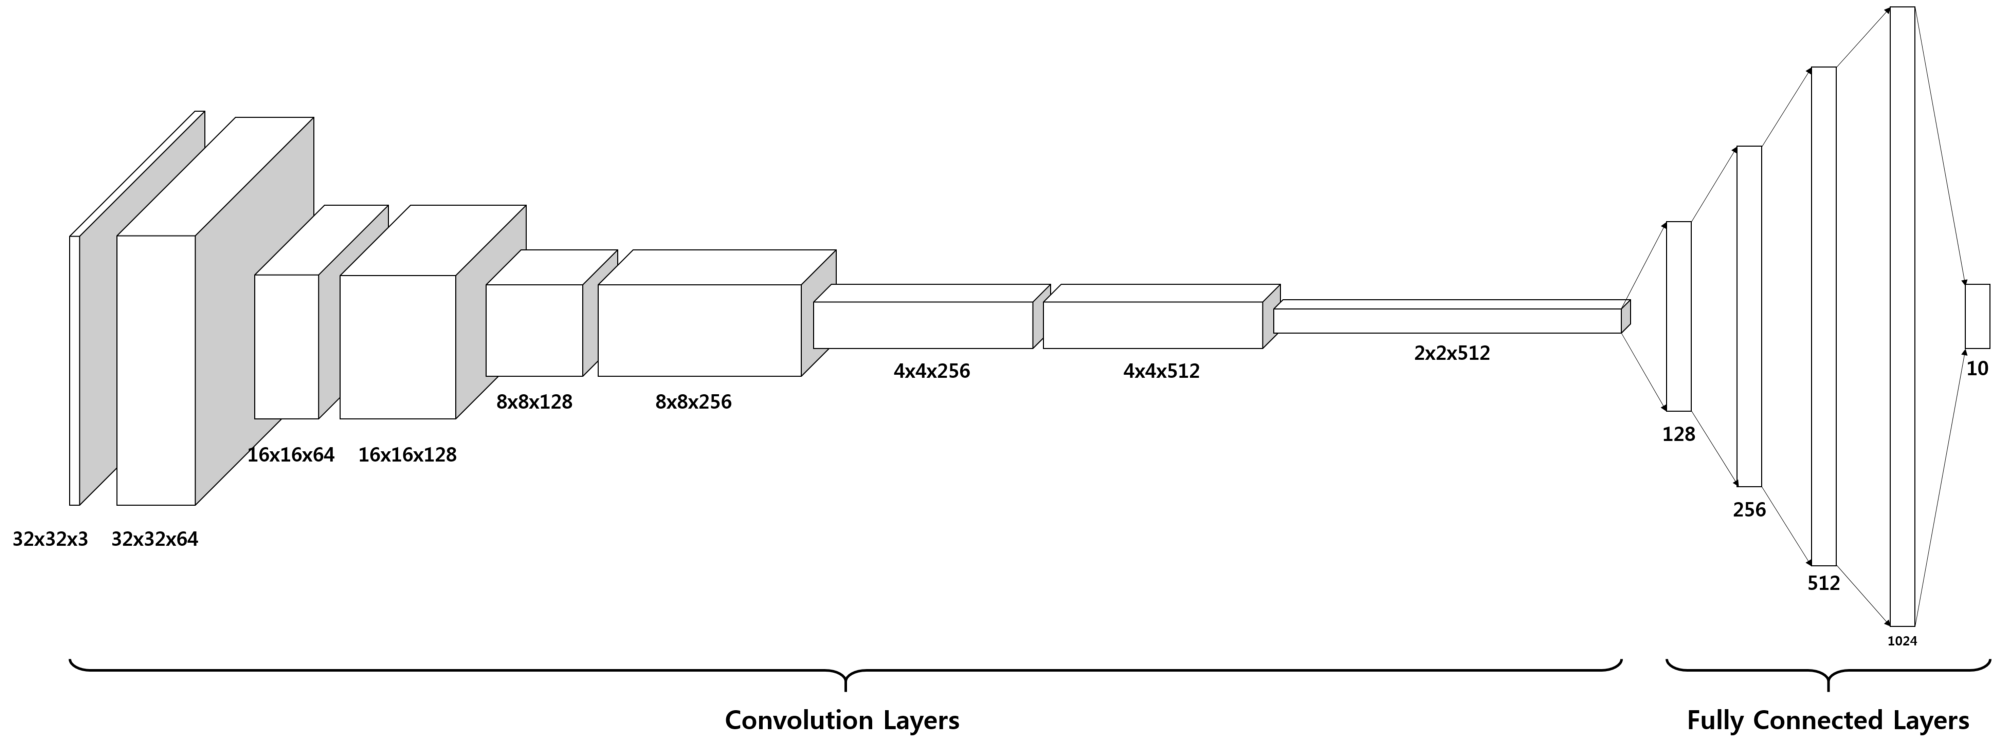


En [3] se indican las siguientes pautas:
- Para el diseño de la arquitectura de una CNN, las dimensiones se reducen y se aumentan los filtros que extraen características. Las CNN se diseñan con un mayor número de filtros en las últimas capas que en las primeras capas porque normalmente existen más combinaciones posibles para agrupar las características básicas que características básicas en sí. Cada capa refina las representaciones de la entrada, lo que permite una captura progresiva de características y patrones.
- La visualización de capas ocultas permite entender lo que la CNN está aprendiendo, y comprobar el nivel de abstracción codificado en cada capa. 
- Las primeras capas y sus filtros codifican características básicas y genéricas de las imágenes: bordes, texturas, detección de puntos aislados, etc. 
- Las últimas capas y sus filtros codifican características de más alto nivel de abstracción: detección de tamaños; en sí partes de un elemento u objetos: ojos, boca, dientes, gafas, etc. 
 
**Métodos Ensemble:** técnicas que combinan las predicciones de varios modelos para mejorar el rendimiento general y la capacidad de generalización del sistema. Estos métodos se basan en la idea de que la combinación de múltiples modelos débiles puede conducir a un modelo fuerte y más robusto. 

Tipos de métodos ensemble:
- **Bagging (Bootstrap Aggregating):** se basa en la creación de múltiples conjuntos de datos de entrenamiento mediante el muestreo con reemplazo (bootstrap) y la construcción de modelos independientes. Ejemplo: Random Forest, que es un conjunto de árboles de decisión entrenados en diferentes subconjuntos de datos de entrenamiento.
- **Boosting:** se centra en mejorar el rendimiento al asignar más peso a las instancias mal clasificadas, lo que permite a los modelos posteriores centrarse en los errores anteriores. Ejemplo: AdaBoost, Gradient Boosting (como XGBoost, LightGBM, y CatBoost).
- **Stacking:** combina las predicciones de varios modelos base utilizando otro modelo, conocido como meta-modelo o modelo de nivel superior. Ejemplo: se entrena una serie de modelos base, y luego se utiliza otro modelo (a menudo un modelo más simple) para combinar sus predicciones.
- **Voting:** se basa en la votación de varios modelos para tomar una decisión final. Ejemplo: Votación mayoritaria, votación ponderada (donde los modelos pueden tener diferentes "pesos" en la decisión final).
- **Blending:** similar a stacking, pero con una división fija del conjunto de entrenamiento para modelos base y modelos de nivel superior. Ejemplo: se entrena un conjunto de modelos base en un subconjunto del conjunto de entrenamiento y luego se utiliza otro conjunto de datos (no superpuesto) para entrenar el modelo de nivel superior. 

El **transfer learning (aprendizaje por transferencia)** es una técnica en el campo del aprendizaje automático y la inteligencia artificial que se basa en la idea de aprovechar el conocimiento adquirido en una tarea (dominio fuente) para mejorar el rendimiento en otra tarea relacionada (dominio destino). En otras palabras, se trata de transferir el conocimiento aprendido en una situación previa a una nueva tarea, lo que puede acelerar y mejorar el rendimiento del modelo en la tarea de destino.

Consideraciones importantes de transfer learning:

**Conocimiento Preexistente:** En el transfer learning, se asume que un modelo previamente entrenado en una tarea relacionada o en un dominio fuente ha adquirido cierto conocimiento sobre los datos y las características relevantes. Este conocimiento se encuentra en los pesos de las capas del modelo, que han sido ajustados a partir de un conjunto de datos.

**Reutilización de Características:** En lugar de entrenar un modelo desde cero, en el transfer learning se reutilizan las características aprendidas por el modelo preexistente. Las capas de un modelo preentrenado se utilizan como extractores de características, y solo las capas finales se adaptan o se reentrenan en la nueva tarea.

**Dominio Fuente y Dominio Destino:** El "dominio fuente" se refiere a la tarea original o los datos en los que se entrenó el modelo preexistente. El "dominio destino" es la nueva tarea o conjunto de datos en los que se busca mejorar el rendimiento. El objetivo es utilizar el conocimiento del dominio fuente para beneficiar al dominio destino.

**Tareas Relacionadas:** El transfer learning funciona mejor cuando la tarea en el dominio fuente está relacionada con la tarea en el dominio destino. Cuanto más similar sea el dominio fuente al destino, más efectiva será la transferencia de conocimiento.

**Ahorro de Tiempo y Recursos:** Una de las ventajas fundamentales del transfer learning es que ahorra tiempo y recursos en comparación con el entrenamiento desde cero, ya que se inicia con un modelo que ya ha aprendido características relevantes.

**Ajuste Fino (Fine-Tuning):** Además de reutilizar características, es común realizar un ajuste fino en las capas finales del modelo para adaptarlo a la tarea específica del dominio destino. Esto permite que el modelo se ajuste a las características particulares de los nuevos datos.

El transfer learning se ha utilizado exitosamente en una amplia gama de aplicaciones, desde el procesamiento de lenguaje natural (NLP) hasta la visión por computadora. Modelos preentrenados, como BERT para NLP o redes neuronales convolucionales (CNN) para visión por computadora, son ejemplos comunes de enfoques de transfer learning que han demostrado ser altamente efectivos. En [4] se presenta el pasado, presente y futuro de los modelos Pre-trained.

**Repositorios de Datasets:**

- https://paperswithcode.com/datasets
- https://paperswithcode.com/methods/category/convolutional-neural-networks
- https://wiki.cancerimagingarchive.net/
    
**Repositorios de modelos preentrenados:**

- Código de aprendizaje profundo de código abierto y modelos preentrenados: https://modelzoo.co/  
- TensorFlow Hub contiene cientos de modelos de aprendizaje automático entrenados y listos para su despliegue en un solo lugar: https://tfhub.dev/

Las **arquitecturas más comunes en CNN** para las técnicas de transfer learning y fine-tuning son:

- VGG16 y VGG19, ResNet, Inception V3: ampliamente utilizadas en tareas de visión por computadora

- Xception: esta arquitectura la propuso François Chollet (el creador de Keras)

- SqueezeNet: extremadamente ligera 

<div id="FundamentosKeras" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de Keras</h2> </div>

Keras es una biblioteca de código abierto para el aprendizaje profundo (deep learning) en Python que se ejecuta sobre otros frameworks de deep learning como TensorFlow, Theano y Microsoft Cognitive Toolkit. Fue diseñada con el objetivo de ser una interfaz de alto nivel y fácil de usar para la creación y entrenamiento de modelos de redes neuronales. Aquí tienes algunos de los fundamentos clave de Keras:

- **Facilidad de uso:** Keras se destaca por su facilidad de uso y una API diseñada de manera intuitiva. Permite a los desarrolladores crear y entrenar modelos de deep learning con un código más simple y legible en comparación con otras bibliotecas.

- **Modularidad:** Keras se basa en el principio de la modularidad. Los modelos se crean mediante la combinación de capas (layers) de manera sencilla y flexible. Puedes apilar capas secuencialmente o crear modelos más complejos con múltiples ramas y conexiones.

- **Compatibilidad con múltiples backends:** Keras es compatible con varios backends, incluyendo TensorFlow, Theano y CNTK. Esto significa que puedes cambiar el backend subyacente sin tener que reescribir todo tu código.

- **Amplia gama de capas y funciones de activación:** Keras ofrece una variedad de capas, como capas densas (fully connected), convolucionales, recurrentes, de normalización, etc. Además, proporciona numerosas funciones de activación y funciones de pérdida personalizables.

- **Entrenamiento y evaluación sencillos:** Keras simplifica el proceso de entrenamiento de modelos con funciones como compile(), fit(), y evaluate(). También ofrece callbacks que permiten monitorear el progreso del entrenamiento y realizar acciones personalizadas durante el mismo.

- **Preprocesamiento de datos integrado:** Keras incluye herramientas para el preprocesamiento de datos, como la normalización y la generación de lotes de datos.

- **Compatibilidad con GPU y TPU:** Keras es compatible con hardware acelerado, como GPUs y TPUs, lo que permite un entrenamiento más rápido de modelos de deep learning.

- **Redes neuronales convolucionales y recurrentes:** Keras es ampliamente utilizado para crear modelos de redes neuronales convolucionales (CNN) y redes neuronales recurrentes (RNN) para tareas de visión por computadora, procesamiento de lenguaje natural y más.

- **Modelos preentrenados:** Keras proporciona acceso a modelos preentrenados en conjuntos de datos masivos, como ImageNet, que se pueden utilizar como base para tareas específicas de clasificación o detección.

- **Comunidad activa y documentación abundante:** Keras tiene una comunidad activa de usuarios y una documentación completa que incluye tutoriales, ejemplos y recursos educativos.

Se puede obtener información actualizada sobre Keras visitando el sitio web oficial de Keras en https://keras.io y la documentación asociada. También se puede encontrar recursos educativos, tutoriales y libros sobre Keras que detallan sus características y usos en profundidad.

<div id="Exploracion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Descripción y exploración del dataset MNIST</h2> </div>

**Dataset: MNIST**

Tabla comparativa de métodos:
https://en.wikipedia.org/wiki/MNIST_database

Enlace interacción web: https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html

El dataset contiene 20000 imágenes. La estructura es una matriz de: 20000 x 785. La primera columna indica la clase (el número entre 0-9).  

Cada fila corresponde a los pixeles de un dígito. Cada imagen es de 28x28 pixeles. Solamente tienen 1 canal.

In [34]:
from tensorflow.keras.datasets import mnist
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
#!pip install seaborn
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn import metrics  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.metrics import specificity_score
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt 

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import model_from_json
from keras.models import load_model

from sklearn.svm import SVC #SVR para regresión
from sklearn.metrics import classification_report
from keras import models
from keras.layers import BatchNormalization, MaxPool2D, GlobalMaxPool2D
#Arquitecturas de Transfer learning. Puedes configurar parámetros específicos de cada arquitectura
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.applications import VGG16, Xception
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D

print('Módulos importados')

Módulos importados


In [2]:
# Funciones para guardar y cargar objetos pickle
def guardarObjeto(pipeline,nombreArchivo):
    print("Guardando Objeto en Archivo") 
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Objeto Guardado en Archivo")  
def cargarObjeto(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
        print("Objeto Cargado desde Archivo") 
    return pipeline
# Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Guardada en Archivo")   
    
def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model

# Función para medir la calidad de modelos
def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = specificity_score(y_test, y_pred, average='macro')

    accuracy=str(round(accuracy, 4))
    precision=str(round(precision, 4))
    recall=str(round(recall, 4))
    f1=str(round(f1, 4))
    specificity=str(round(specificity, 4))
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)
    print("Specificity:", specificity)
    return accuracy, precision, recall, f1, specificity
print('Funciones para guardar y cargar modelos personalizados')

Funciones para guardar y cargar modelos personalizados


In [3]:
# Se puede cargar el dataset directamente de keras. Por efectos de aprendizaje se cargará desde un archivo
# Cargar el conjunto de datos MNIST
# (x_train, y_train), (x_test, y_test) = mnist.load_data()  # MNIST FULL 70000 imágenes

# MNIST SMALL 20000 imágenes, cada imagen es de 28x28 píxeles. Sin embargo, en el csv cada imagen es una fila.
# La primera columna es la clase y las siguientes columnas son los 784 píxeles (28x28=784)
MNIST_train_small_df = pd.read_csv('mnist_train_small.csv', sep=';') 
print(MNIST_train_small_df.shape)
MNIST_train_small_df.head()

(20000, 785)


,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="color:#106ba3"><h3>Exploración de imágenes</h3> </div>

etiqueta: 6
Imagen - Valor Min: 0 Valor Max: 255
shape: (28, 28, 1)


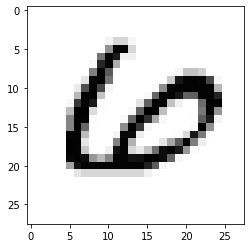

In [4]:
imageId=0
sample_image = MNIST_train_small_df.iloc[imageId]
etiqueta= sample_image[0]#primera columna contiene la clase
print('etiqueta:',etiqueta)
sample_image = sample_image[1:]
print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
im2arr = np.array(sample_image)
im2arr = im2arr.reshape(28,28,1)
print('shape:',im2arr.shape)
#plt.axis('off')
plt.imshow(im2arr, cmap='Greys')

<div style="color:#106ba3"><h3>Formación de conjuntos de Train y Test</h3> </div>

In [5]:
#DIVISION EN: X VARIABLES (VALORES DE CADA PIXEL ENTRE 0-255), Y SALIDA (10 CATEGORIAS -> NÚMEROS ENTRE 0-9)
X_tr = MNIST_train_small_df.iloc[:,1:] # iloc ensures X_tr will be a dataframe
y_tr = MNIST_train_small_df.iloc[:, 0]
print("X_train shape",X_tr.shape)
print("y_train shape",y_tr.shape)

X_train shape (20000, 784)
y_train shape (20000,)


In [6]:
#SPLIT EN TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=42, stratify=y_tr)
#random_state: permite que siempre tengamos las mismas particiones, de tal manera que los resultados se puedan reproducir
#stratify=y permite preservar la distribución de las etiquetas (los números)
print(X_train.shape)
print(X_test.shape)
X_train = X_train/255
X_test = X_test/255
print('Datos normalizados')

(16000, 784)
(4000, 784)
Datos normalizados


<div style="color:#106ba3"><h3>Análisis de frecuencia de categorías</h3> </div>

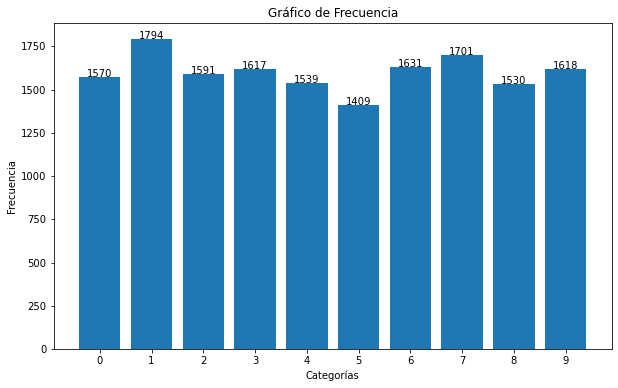

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
Y=y_train.tolist()
#Y.extend(y_test.tolist()) #para analizar la frecuencia de todo el conjunto de datos

# Utiliza Counter para contar las frecuencias de los elementos en la lista
frecuencias = Counter(Y)

# Separa las claves (elementos) y los valores (frecuencias) en listas separadas
elementos = list(frecuencias.keys())
frecuencias = list(frecuencias.values())

# Aumenta el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras
plt.bar(elementos, frecuencias)

# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencia')

# Establece las etiquetas del eje X
plt.xticks(elementos)

# Muestra los valores de los elementos en el gráfico
for i, v in enumerate(frecuencias):
    plt.text(elementos[i], v + 0.1, str(v), ha='center')

# Muestra el gráfico
plt.show()

<div id="DesarrolloSVM" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Desarrollo de SVM</h2> </div>

In [8]:
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifierSVM = SVC(gamma=0.1, kernel='poly', C=1.0, verbose=True)#random_state = 0
#kernels: "linear", "poly", "rbf" y "sigmoid"
#help(SVC)
#Para regresión: sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

SVM Classifier with gamma = 0.1; Kernel = Polynomial


<div style="color:#106ba3"><h3>Entrenamiento y evaluación en Test</h3> </div>

In [9]:
classifierSVM.fit(X_train,y_train)

[LibSVM]

SVC(gamma=0.1, kernel='poly', verbose=True)

In [10]:
#Predicciones del conjunto de Test
y_pred = classifierSVM.predict(X_test)
test_acc_svm = accuracy_score(y_test, y_pred) #accuracy_score hace lo mismo que la función score 
acc_svm=str(round(test_acc_svm, 4))
print('\nSVM Accuracy: ', acc_svm)


SVM Accuracy:  0.9638


In [11]:
obtenerResultados(y_test, y_pred)

Accuracy: 0.9638
Precision: 0.9633
Recall o Sensitivity: 0.9632
F1-Score: 0.9632
Specificity: 0.996


('0.9638', '0.9633', '0.9632', '0.9632', '0.996')

In [12]:
#Comparación de algunas predicciones
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(5)

,real,predicción
10791,2,2
3849,9,9
7081,8,8
9748,8,8
9687,0,0


In [13]:
guardarObjeto(classifierSVM,'Objetos/classifierSVM')

Guardando Objeto en Archivo
Objeto Guardado en Archivo


<div id="DesarrolloCNN" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Desarrollo de CNN</h2> </div>

<div style="color:#106ba3"><h3>Preparación de estructura de imágenes para CNN</h3> </div>

La CNN personalizada requiere trabajar con **tensores**.

Un tensor es una estructura matemática multidimensional que generaliza conceptos como escalares (0 dimensiones), vectores (1 dimensión) y matrices (2 dimensiones) a dimensiones superiores.

En esta caso, 3 dimensiones: (28,28,1), que sería 28 x 28 píxeles y 1 canal. 

In [15]:
# Carga de dataset desde csv
MNIST_train_small_df = pd.read_csv('mnist_train_small.csv', sep=';') 
print(MNIST_train_small_df.shape)
print('Separación de píxeles (X) y clases (Y)')
X_tr = MNIST_train_small_df.iloc[:,1:] # píxeles
y_tr = MNIST_train_small_df.iloc[:, 0] # clases
print("X_train shape",X_tr.shape)
print("y_train shape",y_tr.shape)
# Partición en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=42, stratify=y_tr)
X_train = X_train/255
X_test = X_test/255
print('Partición en Train y Test. Además, se realiza la normalización de datos')
print(X_train.shape)
print(X_test.shape)

(20000, 785)
Separación de píxeles (X) y clases (Y)
X_train shape (20000, 784)
y_train shape (20000,)
Partición en Train y Test. Además, se realiza la normalización de datos
(16000, 784)
(4000, 784)


In [16]:
#Se transforma los dataframes en arrays para aplicar funciones de matrices como reshape
x_train=X_train.values
x_test=X_test.values
x_train=np.array(x_train)
x_test=np.array(x_test)
#Reshape para la entrada de la CNN
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(16000, 28, 28, 1)
(4000, 28, 28, 1)


<div style="color:#106ba3"><h3>Diseño de CNN</h3> </div>

In [29]:
num_classes = 10
input_shape = (28, 28, 1) # estructura de imágenes de MNIST (1 sólo canal)

#iniciamos el modelo
classifierCNN = Sequential()
#añadimos una capa convolucional con 32 filtros de 3x3
#padding='same' aplica un relleno de ceros a la entrada de tal manera que la salida tenga el mismo tamaño que la entrada
#Es decir, el relleno se agrega para que el resultado de la convolución/pooling tenga las mismas dimensiones que la entrada 
classifierCNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = input_shape))
#añadimos otra capa convolucional con 32 filtros de 3x3
classifierCNN.add(Conv2D(32, (3, 3), activation='relu'))
#añadimos una capa de pooling de 3x3
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifierCNN.add(Dropout(0.25))

#repetimos todas las capas otra vez
classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
classifierCNN.add(Dropout(0.25))

#repetimos todas las capas otra vez
classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(3, 3)))
classifierCNN.add(Dropout(0.25))

#añadimos una capa para convertir las matrices en un vector
classifierCNN.add(Flatten())
#añadimos una capa con 512 neuronas
classifierCNN.add(Dense(512, activation='relu'))
classifierCNN.add(Dropout(0.5))
#en la última capa tiene que hacer tantas neuronas como clases haya, en este caso 10
classifierCNN.add(Dense(num_classes, activation='softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

In [20]:
#compilamos el modelo
classifierCNN.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
classifierCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

<div style="color:#106ba3"><h3>Entrenamiento y evaluación en Test</h3> </div>

In [30]:
batch_size = 64
epochs = 20
h = classifierCNN.fit(x_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/20
250/250 [==============================] - 51s 194ms/step - loss: 0.8383 - accuracy: 0.7119 - val_loss: 0.1399 - val_accuracy: 0.9580
Epoch 2/20
250/250 [==============================] - 45s 181ms/step - loss: 0.1910 - accuracy: 0.9439 - val_loss: 0.0804 - val_accuracy: 0.9768
Epoch 3/20
250/250 [==============================] - 40s 159ms/step - loss: 0.1234 - accuracy: 0.9641 - val_loss: 0.0691 - val_accuracy: 0.9803
Epoch 4/20
250/250 [==============================] - 40s 160ms/step - loss: 0.1015 - accuracy: 0.9694 - val_loss: 0.0626 - val_accuracy: 0.9818
Epoch 5/20
250/250 [==============================] - 41s 163ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0619 - val_accuracy: 0.9833
Epoch 6/20
250/250 [==============================] - 44s 176ms/step - loss: 0.0730 - accuracy: 0.9786 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 7/20
250/250 [==============================] - 39s 156ms/step - loss: 0.0608 - accuracy: 0.9821 - val_loss: 0.0432 - val_ac

In [21]:
classifierCNN=cargarNN('Objetos/classifierCNN')

Red Neuronal Cargada desde Archivo


In [22]:
test_acc_cnn = classifierCNN.evaluate(x_test, y_test, verbose=0)
acc_cnn=str(round(test_acc_cnn[1], 4))
print('\nCNN Accuracy: ',acc_cnn)
error_rate_cnn=str(round(test_acc_cnn[0], 4))
print('\nCNN Loss: ',acc_cnn)


CNN Accuracy:  0.992

CNN Loss:  0.992


In [44]:
guardarNN(classifierCNN,'Objetos/classifierCNN')

Guardando Red Neuronal en Archivo
Red Neuronal Guardada en Archivo


In [23]:
#Predicciones del conjunto de Test
y_pred = classifierCNN.predict(x_test)
#argmax identifica el valor máximo para determinar la categoría
y_pred = np.argmax(y_pred, axis=-1) 
y_pred = y_pred.flatten()
#Comparación de algunas predicciones
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(5)

125/125 [==============================] - 3s 21ms/step


,real,predicción
10791,2,2
3849,9,9
7081,8,8
9748,8,8
9687,0,0


In [24]:
obtenerResultados(y_test, y_pred)

Accuracy: 0.992
Precision: 0.992
Recall o Sensitivity: 0.9918
F1-Score: 0.9919
Specificity: 0.9991


('0.992', '0.992', '0.9918', '0.9919', '0.9991')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


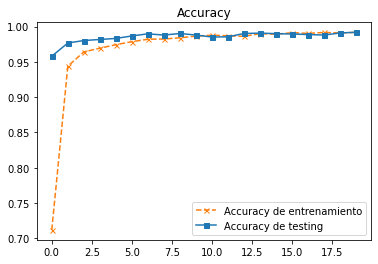

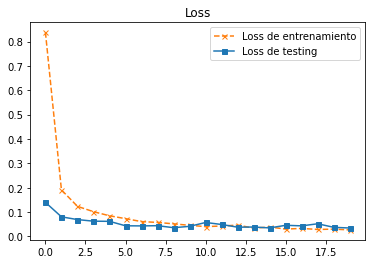

In [36]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, marker='x', linestyle='--', color='C1', ms=5, label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, marker='s', linestyle='-', color='C0', ms=5, label='Accuracy de testing')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, marker='x', linestyle='--', color='C1', ms=5, label='Loss de entrenamiento')
plt.plot(epochs, val_loss, marker='s', linestyle='-', color='C0', ms=5, label='Loss de testing')
plt.title('Loss')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 0.0352
Mean Squared Error (MSE): 0.1962
Root Mean Squared Error (RMSE): 0.443
Accuracy: 0.992
Precision:  0.992
Recall:  0.992
F1: 0.992


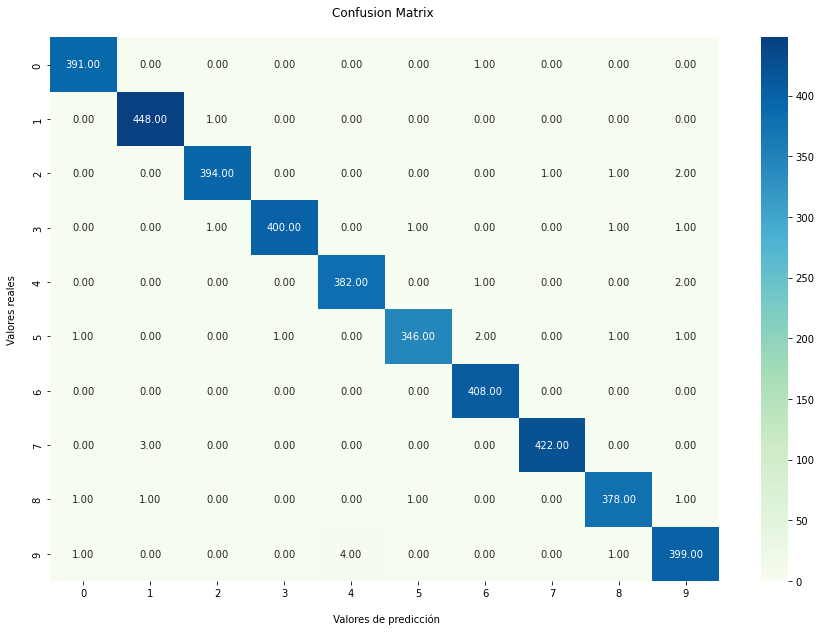

In [25]:
# Se evalúa el modelo con otras medidas de calidad y se presenta la matriz de confusión
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

accuracyModeloBase=str(accuracy_score(y_test,y_pred))
print('Accuracy: ' + accuracyModeloBase) 

precision=precision_score(y_test,y_pred, average='weighted')#average one of [None, 'micro', 'macro', 'weighted']
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_test,y_pred, average='weighted')
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_test,y_pred, average='weighted')
f1=str(round(f1, 4))
print('F1:',f1)

#print('Matriz de confusión:')
#print(confusion_matrix(y_test,y_pred))  

plt.figure(figsize=(15,10))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n');
#fx.xaxis.set_ticklabels(_load_label_names())
#fx.yaxis.set_ticklabels(_load_label_names())
plt.show()

In [26]:
# Se presenta la calidad de clasificación por categoría y a nivel general
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       392
           1       0.99      1.00      0.99       449
           2       0.99      0.99      0.99       398
           3       1.00      0.99      0.99       404
           4       0.99      0.99      0.99       385
           5       0.99      0.98      0.99       352
           6       0.99      1.00      1.00       408
           7       1.00      0.99      1.00       425
           8       0.99      0.99      0.99       382
           9       0.98      0.99      0.98       405

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



<div style="color:#106ba3"><h3>Visualización de capas ocultas - mapas de activación (salidas)</h3> </div>

Se lista las capas de la CNN para identificar las capas en las que realizaremos la visualización. Se seleccionan las capas en donde se ha aplicado mas_pooling.

In [27]:
for layer in classifierCNN.layers:
    print(layer.name)

conv2d_6
conv2d_7
max_pooling2d_3
dropout_4
conv2d_8
conv2d_9
max_pooling2d_4
dropout_5
conv2d_10
conv2d_11
max_pooling2d_5
dropout_6
flatten_1
dense
dropout_7
dense_1


1/1 [==============================] - 0s 196ms/step
max_pooling2d_3 (1, 13, 13, 32)


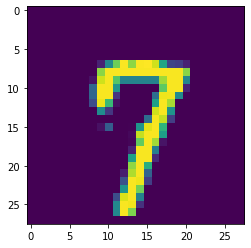

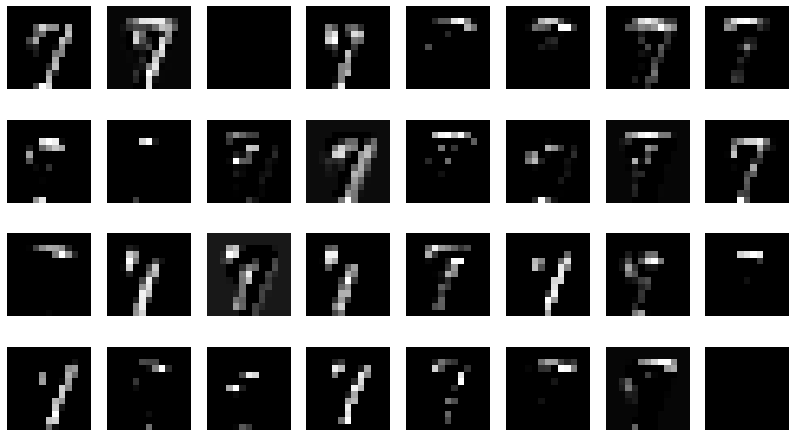

1/1 [==============================] - 0s 278ms/step
max_pooling2d_4 (1, 5, 5, 64)


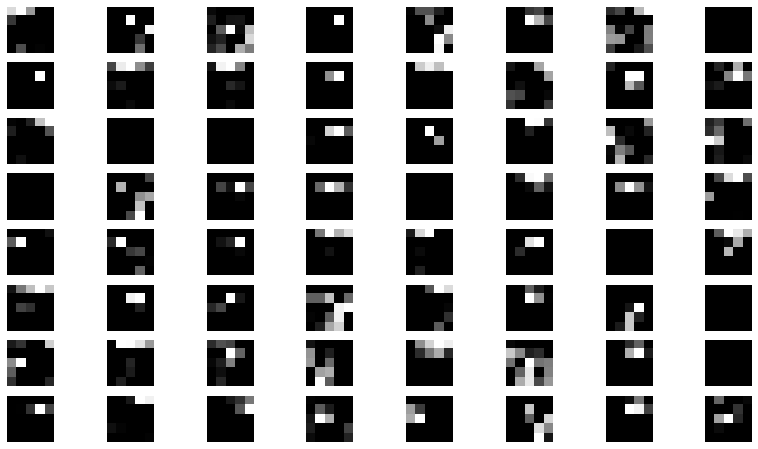

1/1 [==============================] - 0s 246ms/step
max_pooling2d_5 (1, 1, 1, 64)


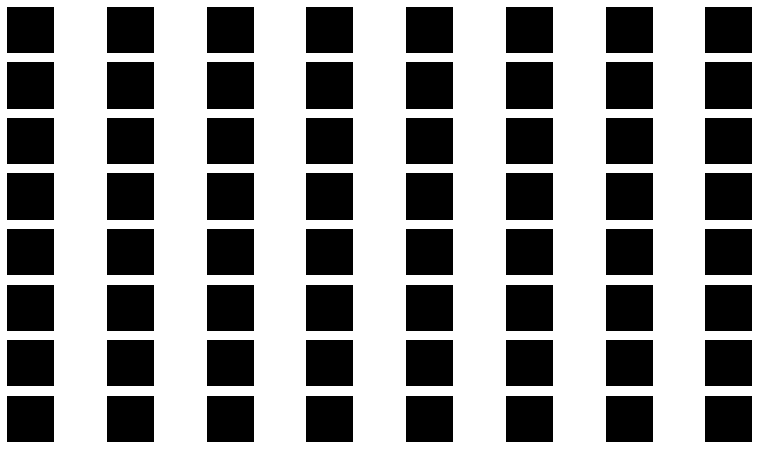

In [28]:
# Se forma la estructura de salida para presentar cada imagen
imagen_Id=3
plt.imshow(x_train[imagen_Id].reshape(28,28).astype('float32'))
number_1 = x_train[imagen_Id].reshape(1,28,28,1).astype('float32')

# Se crea el submodelo activation_model para generar los mapas de activación (salidas) que serán visualizados
def get_activation(layer):
    output = classifierCNN.layers[layer].output # layer output
    activation_model = models.Model(inputs=classifierCNN.input, outputs=output) # submodelo
    activation = activation_model.predict(number_1) # mapa de activación a ser visualizado
    return (activation)

# Método para visualizar los mapas de activación
def plot(activation):
    NUM_COLUMNS = 8 # number of images in a row
    num_filters = activation.shape[-1]
    # draw filter
    num_rows = num_filters//NUM_COLUMNS
    fig, axs = plt.subplots(num_rows, NUM_COLUMNS, figsize=(14,8))
    for r in range(num_rows):
        for c in range(NUM_COLUMNS):
            filter = r * NUM_COLUMNS + c
            axs[r,c].imshow(activation[0,:,:,filter],
                            cmap = plt.get_cmap('gray'))
            axs[r,c].axis('off')
    plt.show()

# Método principal que genera un mapa de activación por cada capa seleccionada de la CNN
for layer in (2,6,10): # max_pooling layers
    activation = get_activation(layer)
    #(1, height, width, num_filters)
    print(classifierCNN.layers[layer].name + " " + str(activation.shape))
    plot(activation)

**Importante:** una vez completada la etapa de visualización, el procedimiento subsecuente implica un análisis detallado por categoría, dirigido a comprender las características preeminentes o combinaciones de características identificadas por los filtros de la Convolutional Neural Network (CNN) con el propósito de reconocer patrones significativos y realizar predicciones precisas en cada categoría. Ilustrativamente, al examinar las imágenes generadas por las capas max_pooling2d_3 (1, 13, 13, 32) y max_pooling2d_4 (1, 5, 5, 64), se observa que la línea diagonal asociada al número siete y la línea vertical corta superior destacan visualmente como patrones identificados de manera sobresaliente por los filtros. Es plausible sugerir que estas características específicas podrían desempeñar un papel fundamental en la capacidad predictiva de la CNN al determinar si una imagen en consideración corresponde al dígito siete.

<div id="DesarrolloCNN-TL" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Desarrollo de CNN con Transfer Learning</h2> </div>

In [35]:
# Carga de dataset desde csv
MNIST_train_small_df = pd.read_csv('mnist_train_small.csv', sep=';') 
print(MNIST_train_small_df.shape)
print('Separación de píxeles (X) y clases (Y)')
X_tr = MNIST_train_small_df.iloc[:,1:] # píxeles
y_tr = MNIST_train_small_df.iloc[:, 0] # clases
print("X",X_tr.shape)
print("y",y_tr.shape)
print('Partición en Train y Test')
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=42, stratify=y_tr)
#Partimos de las mismas particiones de datos
x_train=X_train.values
x_test=X_test.values
x_train=np.array(x_train)
x_test=np.array(x_test)
print('Reshape para la entrada de la CNN')
x_train=x_train.reshape(x_train.shape[0],28,28)
x_test=x_test.reshape(x_test.shape[0],28,28)
print(x_train.shape)
print(x_test.shape)
## Se convierte a uint8.  Este tipo de dato tiene un rango de valores que va desde 0 hasta 255, 
## ya que utiliza 8 bits de memoria para almacenar la información.
x_train = np.uint8(x_train)
x_test = np.uint8(x_test)
print('Normalización de datos') #La red será más rápida
x_train = x_train / 255.0  # Normalizar los valores de píxeles
x_test = x_test / 255.0
print('Reshape a 32x32x3') # Los modelos preentrenados admiten un mínimo de tamaño de imagen
x_train = np.repeat(x_train[:, :, :, np.newaxis], 3, axis=-1)
x_train = tf.image.resize(x_train, (32, 32))

x_test = np.repeat(x_test[:, :, :, np.newaxis], 3, axis=-1)
x_test = tf.image.resize(x_test, (32, 32))

(20000, 785)
Separación de píxeles (X) y clases (Y)
X (20000, 784)
y (20000,)
Partición en Train y Test
Reshape para la entrada de la CNN
(16000, 28, 28)
(4000, 28, 28)
Normalización de datos
Reshape a 32x32x3


<div style="color:#106ba3"><h3>Definición de funciones para modelo personalizado y modelos preentrenados</h3> </div>

In [36]:
# CNN personalizada
def build_convnet(shape=(32, 32, 3)):

    momentum = .9
    model = keras.Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = shape))
    #añadimos otra capa convolucional con 32 filtros de 3x3
    model.add(Conv2D(32, (3, 3), activation='relu'))
    #añadimos una capa de pooling de 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
    model.add(Dropout(0.25))

    #repetimos todas las capas otra vez
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #repetimos todas las capas otra vez
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    # flatten...
    model.add(GlobalMaxPool2D())
    return model

def build_mobilenet(shape=(32, 32, 3), nbout=10):
    model = keras.applications.mobilenet.MobileNet(
        include_top=False,
        input_shape=shape,
        weights='imagenet')
    # Keep 9 layers to train
    trainable = 9
    for layer in model.layers[:-trainable]:
        layer.trainable = False
    for layer in model.layers[-trainable:]:
        layer.trainable = True
    output = GlobalMaxPool2D()
    return keras.Sequential([model, output])

def build_vgg16(shape=(32, 32, 3), nbout=10):
    model = VGG16(weights="imagenet", include_top=False, input_shape=shape)
    model.trainable = False ## Not trainable weights
    output = GlobalMaxPool2D()
    return keras.Sequential([model, output])

def build_ResNet50(shape=(32, 32, 3), nbout=10):
    model= ResNet50(include_top=False, input_shape=shape, pooling='avg', classes=5, weights='imagenet')
    for layer in model.layers:
            layer.trainable=False
    #output = GlobalMaxPool2D()
    return model

def build_Xception(shape=(32, 32, 3), nbout=10):
    model = Xception(weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=shape,
    include_top=False)  # Do not include the ImageNet classifier at the top.
    model.trainable = False
    output = GlobalAveragePooling2D()
    return keras.Sequential([model, output])

def build_InceptionResNetV2(shape=(32, 32, 3), nbout=10):
    #InceptionResNetV2 = preprocess_input
    model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=shape)
    model.trainable = False
    output = GlobalAveragePooling2D()
    return keras.Sequential([model, output])

def build_MobileNetV2(shape=(32, 32, 3), nbout=10):
    #InceptionResNetV2 = preprocess_input
    model = MobileNetV2(input_shape=shape, include_top=False)
    model.trainable = False
    output = GlobalAveragePooling2D()
    return keras.Sequential([model, output])

In [37]:
from keras.layers import TimeDistributed, GRU, LSTM, Dense, Dropout
from keras.applications import MobileNetV2
def action_model(shape=(32, 32, 3), nbout=10):

    ##Parte 1: CNN/Transfer Learning
    # Aquí puedes indicar la arquitectura deseada de CNN previo al proceso de la Red Densa
    #convnet = build_convnet(shape) #-> es la CNN personalizada
    #convnet = build_mobilenet(shape)
    convnet = build_vgg16(shape)
    #convnet = build_ResNet50(shape)
    #convnet = build_Xception(shape)
    #convnet = build_InceptionResNetV2(shape)
    #convnet = build_MobileNetV2(shape)
    
    ##Parte 2: Red Densa/Estándar
    model = keras.Sequential()
    model.add(convnet)
    #añadimos una capa con 512 neuronas
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    #en la última capa tiene que haber tantas neuronas como clases haya, en este caso 10
    model.add(Dense(nbout, activation='softmax'))

    return model

<div style="color:#106ba3"><h3>Construcción de modelo con Transfer Learning</h3> </div>

In [70]:
# Definición de parámetros y construcción del modelo
SIZE = (32, 32)
CHANNELS = 3
INSHAPE=SIZE + (CHANNELS,) # (32, 32, 3)
print(INSHAPE)
nbout=10#cantidad de clases
modelCNN_TL = action_model(INSHAPE, nbout)
#optimizer = keras.optimizers.Adam(0.001)
modelCNN_TL.compile(
    #optimizer=optimizer,
    loss='sparse_categorical_crossentropy',#'binary_crossentropy'
    optimizer='adam',
    metrics=['acc']
)
modelCNN_TL.summary()

(32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 512)               14714688  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [71]:
BS = 64
epocas = 5
history = modelCNN_TL.fit(x_train, y_train, epochs=epocas, verbose=2, batch_size= BS)

Epoch 1/5
250/250 - 119s - loss: 0.7182 - acc: 0.7778 - 119s/epoch - 475ms/step
Epoch 2/5
250/250 - 119s - loss: 0.3139 - acc: 0.9035 - 119s/epoch - 476ms/step
Epoch 3/5
250/250 - 118s - loss: 0.2415 - acc: 0.9252 - 118s/epoch - 474ms/step
Epoch 4/5
250/250 - 122s - loss: 0.2062 - acc: 0.9329 - 122s/epoch - 490ms/step
Epoch 5/5
250/250 - 109s - loss: 0.1861 - acc: 0.9399 - 109s/epoch - 434ms/step


In [38]:
modelCNN_TL=cargarNN('Objetos/modelCNN_TL')

Red Neuronal Cargada desde Archivo


In [39]:
test_acc_cnn_tl = modelCNN_TL.evaluate(x_test, y_test, verbose=0)
acc_cnn_tl=str(round(test_acc_cnn_tl[1], 4))
print('\nCNN_TL Accuracy: ',acc_cnn_tl)
error_rate_cnn_tl=str(round(test_acc_cnn_tl[0], 4))
print('\nCNN_TL Loss: ',acc_cnn_tl)


CNN_TL Accuracy:  0.954

CNN_TL Loss:  0.954


In [42]:
#Predicciones del conjunto de Test
y_pred = modelCNN_TL.predict(x_test)
#argmax identifica el valor máximo para determinar la categoría
y_pred = np.argmax(y_pred, axis=-1) 
y_pred = y_pred.flatten()
#Comparación de algunas predicciones
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(5)

125/125 [==============================] - 25s 195ms/step


,real,predicción
10791,2,2
3849,9,9
7081,8,8
9748,8,8
9687,0,0


In [43]:
obtenerResultados(y_test, y_pred)

Accuracy: 0.954
Precision: 0.953
Recall o Sensitivity: 0.9535
F1-Score: 0.9531
Specificity: 0.9949


('0.954', '0.953', '0.9535', '0.9531', '0.9949')

In [120]:
guardarNN(modelCNN_TL,'Objetos/modelCNN_TL')

Guardando Red Neuronal en Archivo
Red Neuronal Guardada en Archivo


<div id="DesarrolloEnsembleClasicos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Desarrollo de Ensemble de Métodos Clásicos</h2> </div>

La idea es mejorar la precisión y reducir el sobreajuste al combinar múltiples modelos base.

In [158]:
# Carga de dataset desde csv
MNIST_train_small_df = pd.read_csv('mnist_train_small.csv', sep=';') 
print(MNIST_train_small_df.shape)
print('Separación de píxeles (X) y clases (Y)')
X_tr = MNIST_train_small_df.iloc[:,1:] # píxeles
y_tr = MNIST_train_small_df.iloc[:, 0] # clases
print("X",X_tr.shape)
print("y",y_tr.shape)
print('Partición en Train y Test')
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=42, stratify=y_tr)
#random_state: permite que siempre tengamos las mismas particiones, de tal manera que los resultados se puedan reproducir
#stratify=y permite preservar la distribución de las etiquetas (los números)
print(X_train.shape)
print(X_test.shape)
X_train = X_train/255
X_test = X_test/255
print('Datos normalizados')

(20000, 785)
Separación de píxeles (X) y clases (Y)
X (20000, 784)
y (20000,)
Partición en Train y Test
(16000, 784)
(4000, 784)
Datos normalizados


In [159]:
# Métodos de conjunto
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Crear los modelos individuales
ensemble_classifierSVM = SVC(gamma=0.1, kernel='poly', C=1.0, verbose=True)#random_state = 0
ensemble_classifierSVM.fit(X_train, y_train)

ensemble_classifierRandomForest = RandomForestClassifier(n_estimators=100, max_depth=20)#max_depth=5, random_state=0
ensemble_classifierRandomForest.fit(X_train, y_train)

print('Modelos individuales entrenados')

base_estimators = [
    ensemble_classifierSVM,
    ensemble_classifierRandomForest
]

# Crear el ensemble con bagging en paralelo
classic_ensemble_model = BaggingClassifier(base_estimator=None, n_estimators=200, n_jobs=-1)
classic_ensemble_model.estimators_ = base_estimators

[LibSVM]Modelos individuales entrenados


In [ ]:
# Entrenar el ensemble
classic_ensemble_model.fit(X_train, y_train)
print('Modelos ensemble entrenado')

In [ ]:
y_pred = classic_ensemble_model.predict(X_test)

test_acc_classic_ensemble = accuracy_score(y_test, y_pred) #accuracy_score hace lo mismo que la función score 
acc_classic_ensemble=str(round(test_acc_classic_ensemble, 4))
print('\nClassic Ensemble Accuracy: ', acc_classic_ensemble)

In [148]:
obtenerResultados(y_test, y_pred)

Accuracy: 0.9305
Precision: 0.9295
Recall o Sensitivity: 0.9293
F1-Score: 0.9293
Specificity: 0.9923


('0.9305', '0.9295', '0.9293', '0.9293', '0.9923')

In [150]:
guardarObjeto(classic_ensemble_model,'Objetos/classic_ensemble_model')

Guardando Objeto en Archivo
Objeto Guardado en Archivo


<div id="DesarrolloEnsembleCNNs" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Ensemble de Redes Neuronales Convolucionales (Personalizadas y Preentrenadas)</h2> </div>

In [44]:
# Carga de dataset desde csv
MNIST_train_small_df = pd.read_csv('mnist_train_small.csv', sep=';') 
print(MNIST_train_small_df.shape)
print('Separación de píxeles (X) y clases (Y)')
X_tr = MNIST_train_small_df.iloc[:,1:] # píxeles
y_tr = MNIST_train_small_df.iloc[:, 0] # clases
print("X",X_tr.shape)
print("y",y_tr.shape)
print('Partición en Train y Test')
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=42, stratify=y_tr)
x_train=X_train.values
x_test=X_test.values
x_train=np.array(x_train)
x_test=np.array(x_test)
print('Reshape para la entrada de CNNs')
x_train=x_train.reshape(x_train.shape[0],28,28)
x_test=x_test.reshape(x_test.shape[0],28,28)
print(x_train.shape)
print(x_test.shape)
## Se convierte a uint8.  Este tipo de dato tiene un rango de valores que va desde 0 hasta 255, 
## ya que utiliza 8 bits de memoria para almacenar la información.
x_train = np.uint8(x_train)
x_test = np.uint8(x_test)
print('Normalización de datos') #La red será más rápida
x_train = x_train / 255.0  # Normalizar los valores de píxeles
x_test = x_test / 255.0
print('Reshape a 32x32x3') # Los modelos preentrenados admiten un mínimo de tamaño de imagen
# Realizar un reshape a 32x32x3
x_train = np.repeat(x_train[:, :, :, np.newaxis], 3, axis=-1)
x_train = tf.image.resize(x_train, (32, 32))

x_test = np.repeat(x_test[:, :, :, np.newaxis], 3, axis=-1)
x_test = tf.image.resize(x_test, (32, 32))

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

(20000, 785)
Separación de píxeles (X) y clases (Y)
X (20000, 784)
y (20000,)
Partición en Train y Test
Reshape para la entrada de CNNs
(16000, 28, 28)
(4000, 28, 28)
Normalización de datos
Reshape a 32x32x3


In [5]:
# Crear los modelos individuales
# Modelo VGG16 preentrenado
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_output = Flatten(name="vgg_flatten")(vgg_model.output)

# Los modelos no deben tener entre ellos el mismo nombre de capas. Se renombra las capas
for i, layer in enumerate(vgg_model.layers):
    # layer.name = 'layer_' + str(i)    <-- old way
    layer._name = 'layervgg_' + str(i)

# Modelo ResNet preentrenado
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet_output = Flatten(name="resnet_flatten")(resnet_model.output)

# Modelo CNN propia
custom_model = Sequential(name="custom_cnn")
custom_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = (32, 32, 3)))
custom_model.add(Conv2D(32, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Dropout(0.25))
#repetimos todas las capas otra vez
custom_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
custom_model.add(Conv2D(64, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Dropout(0.25))
#repetimos todas las capas otra vez
custom_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
custom_model.add(Conv2D(64, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Dropout(0.25))
custom_model.add(Flatten())
custom_output = custom_model.output

# Combinar las salidas de los tres modelos
merged = concatenate([vgg_output, resnet_output, custom_output])

# Agregar capas de clasificación
x = Dense(512, activation='relu', name="dense1")(merged)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax', name="output")(x)  # 10 clases en MNIST

# Crear el modelo de ensemble
ensemble_model = Model(inputs=[vgg_model.input, resnet_model.input, custom_model.input], outputs=output)

# Compilar y entrenar el modelo de ensemble
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Modelos creados')

(16000, 28, 28)
(4000, 28, 28)
Modelos creados


In [7]:
ensemble_model.fit([x_train, x_train, x_train], y_train, epochs=19, batch_size=64, validation_data=([x_test, x_test, x_test], y_test))
#verbose=2
#n_jobs=-1
# Evaluar el modelo de ensemble
accuracy = ensemble_model.evaluate([x_test, x_test, x_test], y_test)
print("Precisión del modelo de ensemble:", accuracy[1])

Epoch 1/19
250/250 [==============================] - 1537s 6s/step - loss: 0.1612 - accuracy: 0.9654 - val_loss: 1.9720 - val_accuracy: 0.2760
Epoch 2/19
250/250 [==============================] - 1540s 6s/step - loss: 0.1046 - accuracy: 0.9758 - val_loss: 0.5275 - val_accuracy: 0.8322
Epoch 3/19
250/250 [==============================] - 1547s 6s/step - loss: 0.0604 - accuracy: 0.9859 - val_loss: 0.4128 - val_accuracy: 0.8923
Epoch 4/19
250/250 [==============================] - 1566s 6s/step - loss: 0.2089 - accuracy: 0.9636 - val_loss: 6.4139 - val_accuracy: 0.8608
Epoch 5/19
250/250 [==============================] - 1559s 6s/step - loss: 0.2372 - accuracy: 0.9654 - val_loss: 0.0866 - val_accuracy: 0.9768
Epoch 6/19
250/250 [==============================] - 1541s 6s/step - loss: 0.0656 - accuracy: 0.9825 - val_loss: 0.0603 - val_accuracy: 0.9827
Epoch 7/19
250/250 [==============================] - 1579s 6s/step - loss: 0.0451 - accuracy: 0.9883 - val_loss: 0.0692 - val_accuracy:

In [167]:
accuracy = ensemble_model.evaluate([x_test, x_test, x_test], y_test)
print("Accuracy del modelo CNNs Ensemble:", accuracy[1])

125/125 [==============================] - 40s 316ms/step - loss: 0.0530 - accuracy: 0.9858
Accuracy del modelo CNNs Ensemble: 0.9857500195503235


In [46]:
ensemble_model=cargarNN('Objetos/ensemble_model_3CNNs')

Red Neuronal Cargada desde Archivo


In [47]:
y_pred = ensemble_model.predict([x_test, x_test, x_test])
print('Predicciones generadas')

y_test_single_column = np.argmax(y_test, axis=1)
y_pred_single_column = np.argmax(y_pred, axis=1)

test_acc_ensemble_model_CNNs = accuracy_score(y_test_single_column, y_pred_single_column) #accuracy_score hace lo mismo que la función score 
acc_ensemble_model_CNNs=str(round(test_acc_ensemble_model_CNNs, 4))
print('\nCNNs Ensemble Accuracy: ', acc_ensemble_model_CNNs)

125/125 [==============================] - 40s 294ms/step
Predicciones generadas

CNNs Ensemble Accuracy:  0.9858


In [48]:
obtenerResultados(y_test_single_column, y_pred_single_column)

Accuracy: 0.9858
Precision: 0.9857
Recall o Sensitivity: 0.9856
F1-Score: 0.9856
Specificity: 0.9984


('0.9858', '0.9857', '0.9856', '0.9856', '0.9984')

In [9]:
guardarNN(ensemble_model,'ensemble_model_3CNNs')

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo


<div id="ComparacionModelos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Comparación de Modelos</h2> </div>

In [50]:
tabla = pd.DataFrame(columns=('Método', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity'))
tabla.loc[len(tabla)]=['SVM',0.9638, 0.9633, 0.9632, 0.9632, 0.996] 
tabla.loc[len(tabla)]=['CNN',0.992, 0.992, 0.9918, 0.9919, 0.9991] 
tabla.loc[len(tabla)]=['CNN_TL',0.954, 0.953, 0.9535, 0.9531, 0.9949]
tabla.loc[len(tabla)]=['Classic Ensemble: SVM y RF',0.9305, 0.9295, 0.9293, 0.9293, 0.9923]
tabla.loc[len(tabla)]=['CNNs Ensemble',0.9858, 0.9857, 0.9856, 0.9856, 0.9984]
tabla.head()

,Método,Accuracy,Precision,Recall,F1-Score,Specificity
0,SVM,0.9638,0.9633,0.9632,0.9632,0.9960
1,CNN,0.9920,0.9920,0.9918,0.9919,0.9991
2,CNN_TL,0.9540,0.9530,0.9535,0.9531,0.9949
3,Classic Ensemble: SVM y RF,0.9305,0.9295,0.9293,0.9293,0.9923
4,CNNs Ensemble,0.9858,0.9857,0.9856,0.9856,0.9984


<div id="PrediccionNuevasImagenes" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Predicción de nuevas imágenes</h2> </div>

<div style="color:#106ba3"><h3>1. Predicción de una imagen específica del conjunto de datos de Test</h3> </div>

real:  2
1/1 [==============================] - 0s 410ms/step
predicción:  [0 0 1 0 0 0 0 0 0 0]
1/1 [==============================] - 0s 64ms/step
probabilidades:  [[0 0 1 0 0 0 0 0 0 0]]
clase con mayor probabilidad:  2
probabilidad:  100.0%


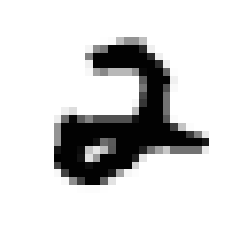

In [174]:
import matplotlib.pyplot as plt
from PIL import Image

#Visualizar imagen
image_index = 19000
print('real: ', y_tr[image_index]) # Etiqueta real
img1 = X_tr[image_index:]
img2=np.resize(img1, (28,28))
plt.axis('off')
plt.imshow(img2, cmap='Greys')

#Guardar imagen
plt.savefig('imagen/imagen1.png')
img3=Image.open('imagen/imagen1.png')

#Clasificar imagen
im2arr = np.array(img2)
im2arr = im2arr.reshape(1,28,28,1)
y_pred = classifierCNN.predict(im2arr)
print('predicción: ', y_pred[0])
y_pred=classifierCNN.predict(im2arr)
print('probabilidades: ',y_pred)
ClaseMayorProbabilidad=np.argmax(y_pred)
prob = y_pred.tolist()[0][ClaseMayorProbabilidad]
print('clase con mayor probabilidad: ',ClaseMayorProbabilidad)
print('probabilidad: ', str(round(prob*100, 4))+'%')

<div style="color:#106ba3"><h3>2. Predicción de una imagen desde un Path</h3> </div>

In [175]:
import cv2
gray = cv2.imread("imagen/" + "NumeroNuevo2.png")
# resize la imagen e invierte a fondo negro
gray = cv2.resize(255-gray, (28, 28))

# Guardar la imagen procesada
cv2.imwrite("imagen/" + "imagen2.png", gray)
flatten = gray.flatten() / 255.0

1/1 [==============================] - 0s 64ms/step
predicción:  [0 0 0 0 0 0 0 1 0 0]
1/1 [==============================] - 0s 58ms/step
probabilidades:  [[0 0 0 0 0 0 0 1 0 0]]
clase con mayor probabilidad:  7
probabilidad:  100.0%


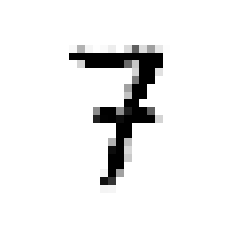

In [181]:
#Predicción de una imagen desde un path
target_labels=y_test
target_labels=np.array(target_labels)
#img1 = Image.open("imagen/" + "MNIST_44_0.png").convert("L")
img1 = Image.open("imagen/" + "imagen2.png").convert("L")

img2 = np.resize(img1, (28,28))
plt.axis('off')
plt.imshow(img1, cmap='Greys')

#Guardar imagen
plt.savefig('imagen/imagen3.png')
img3=Image.open('imagen/imagen3.png')

im2arr = np.array(img2)
im2arr = im2arr.reshape(1,28,28,1)
y_pred = classifierCNN.predict(im2arr)
print('predicción: ',y_pred[0])
y_pred=classifierCNN.predict(im2arr)
print('probabilidades: ',y_pred)
ClaseMayorProbabilidad=np.argmax(y_pred)
prob = y_pred.tolist()[0][ClaseMayorProbabilidad]
print('clase con mayor probabilidad: ',ClaseMayorProbabilidad)
print('probabilidad: ', str(round(prob*100, 4))+'%')

<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

- En esta práctica has construido y comparado varios modelos: una máquina de soporte vectorial, una red neuronal convolucional personalizada, un modelo que incluye CNNs preentrenadas, un modelo ensemble de técnicas clásicas y un modelo ensemble de 3 CNNs (1 personalizada y 2 preentrenadas).

- Los resultados demuestran la superioridad de las redes CNN y la combinacióne de estas. 

- SVM y CNN: son las técnicas más comunes para clasificación de imágenes.

- SVM: generan hiperplanos para clasificar en ambientes de varias dimensiones. Intuitivas por su geometría analítica. 

- **Desafío CNN:** Las redes neuronales son cajas negras. Una área muy grande por explorar es la explicación del proceso de aprendizaje y la justificación de las predicciones.

- CNN: utilizan tensores. Con imágenes se puede visualizar e intentar explicar las salidas de las capas ocultas.

- CNN: más filtros en ultimas capas para extraer mas características o combinaciones de características (más conocimiento).

- Los modelos preentrenados ahorran mucho tiempo. El **desafío de los modelos preentrenados** es utilizar modelos preentrenados aplicados a un dominio parecido al problema en cuestión. Ejemplo: modelo preentrenado de detección de rostros para reconocer nuevos rostros. Esto invita a guardar y compartir modelos, para incorporar en otros modelos.

- El Ensemble de modelos sirve para evitar sobreajuste y tener modelos más robustos.

- **Desafío de Métodos Ensemble:** crear métodos eficientes (menos recursos computacionales y energía).

- **Desafío general:** crear modelos multimodales (comprender y generar) para fusión de texto, imágenes y otros tipos de datos.

<div id="Referencias" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. Springer.

[2] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

[3] Bobadilla, J. (2021). Machine learning y deep learning: usando Python, Scikit y Keras. Ediciones de la U.

[4] Han, X., Zhang, Z., Ding, N., Gu, Y., Liu, X., Huo, Y., ... & Zhu, J. (2021). Pre-trained models: Past, present and future. AI Open, 2, 225-250.

**Enlaces de documentación de scikit-learn, tensorflow y keras:**

https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html